### Import Library

In [18]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn import cross_validation
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

### Load Data

In [2]:
df = pd.read_csv("./data/winequality-white.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Separate the dataset into **feature matrix X** & **respoinse vector y**.

In [3]:
X_df = df.iloc[:,:-1]
X_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [4]:
X = X_df.as_matrix()
y_df = df["quality"].values
print(y_df[:10])

[6 6 6 6 6 6 6 6 6 6]


### Data Preview

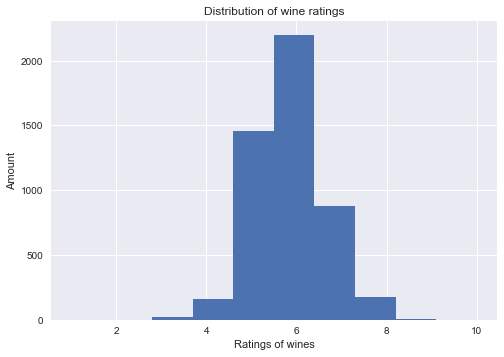

In [5]:
plt.hist(y_df, range=(1, 10))

plt.xlabel('Ratings of wines')
plt.ylabel('Amount')
plt.title('Distribution of wine ratings')
plt.show()

In [6]:
# sklearn can only deal with numpy arrys
Y = np.array([1 if i>=7 else 0 for i in y_df])


### SVM Classifier Construction

Choose SVM method to do the classification.

In [12]:
#Split set into test and train
# X_test=[]
# X_train=[]
# Y_test=[]
# Y_train=[]

# X_test=[X[i] for i in range(int(0.2*len(X)))]
# X_train=[X[i] for i in range(int(0.2*len(X)),len(X))]
# Y_test=[Y[i] for i in range(int(0.2*len(Y)))]
# Y_train=[Y[i] for i in range(int(0.2*len(Y)),len(Y))]

X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
X_train, X_val, Y_train, Y_val = train_test_split(X_training, Y_training, test_size=0.2, random_state=20)

In [13]:
sm = SMOTE(random_state=20, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
loo=LeaveOneOut()
loo.get_n_splits(Y_train)
cv_scores=[]


for num_trees in range(1,20):
#     print(num_trees)
#     print(len(x_train_res), len(y_train_res))
    model = RandomForestClassifier(n_estimators = num_trees, random_state=20)
    scores=cross_val_score(model, x_train_res, y_train_res, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1 - x for x in cv_scores]

print ("index          Score          MSE")
for i in range(len(cv_scores)):
    print ('%d          %.5f          %.5f'% (i+1, cv_scores[i],MSE[i]))
    

index          Score          MSE
1          0.79268          0.20732
2          0.79412          0.20588
3          0.83956          0.16044
4          0.84243          0.15757
5          0.85573          0.14427
6          0.85778          0.14222
7          0.86821          0.13179
8          0.87006          0.12994
9          0.87558          0.12442
10          0.87517          0.12483
11          0.88008          0.11992
12          0.87988          0.12012
13          0.87988          0.12012
14          0.88111          0.11889
15          0.88356          0.11644
16          0.88459          0.11541
17          0.88336          0.11664
18          0.88582          0.11418
19          0.88581          0.11419


In [21]:
clf_rf = RandomForestClassifier(n_estimators=18, random_state=20)
clf_rf.fit(X_train, Y_train)

print ('Validation Results')
print ('Accuracy')
print (clf_rf.score(X_val, Y_val))
print ('Recall')
print (recall_score(Y_val, clf_rf.predict(X_val)))
print ('\nTest Results')
print ('Accuracy')
print (clf_rf.score(X_test, Y_test))
print ('Recall')
print (recall_score(Y_test, clf_rf.predict(X_test)))

Validation Results
Accuracy
0.878826530612
Recall
0.588235294118

Test Results
Accuracy
0.876530612245
Recall
0.522613065327


[]

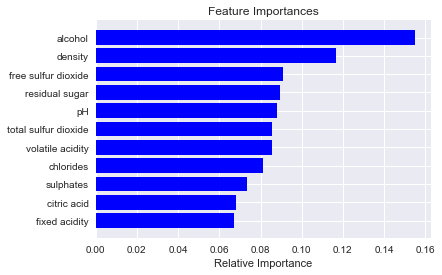

In [20]:
#feature selection
model=RandomForestClassifier(n_estimators=18)
model.fit(X_train,Y_train)

features = df.columns[0:12]
importances = model.feature_importances_
indices = np.argsort(importances)
 
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.plot()